In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\merged_data.csv")

X = merged_data[
    [
        "Wealth",
        # "Opportunities",
        "Career Years",
        "Sex",
        "Job",
        "Dieseases",
        "Has Car",
        "Has House",
        # "Job Loss Probability",
        # "Reproduction Chance",
        "Child Possibility",
        "Personal Luxuries",
        "Healthcare Cost",
        "actual_children"
    ]
]
y = merged_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

Group
1    38154
0    22073
Name: count, dtype: int64

In [2]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM.pkl")
y_pred = model.predict(X_test)

diseases = X_test["Dieseases"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=diseases
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

Overall Metric Frame:  0.7179700038740384

Metric Frame by group:  Dieseases
0    0.776696
1    0.686984
2    0.623272
3    0.428769
4    0.332031
5    0.408602
6    0.312500
7    0.000000
8    0.000000
9    0.000000
Name: accuracy_score, dtype: float64


The Overall Metric Frame value of 0.7179 represents the specified overall performance metric (accuracy) across all groups combined. This suggests that the model’s accuracy is about 71.8% when evaluated on the entire dataset, without differentiating between groups based on the Diseases feature.

array([[<Axes: title={'center': 'accuracy'}, xlabel='Dieseases'>,
        <Axes: title={'center': 'precision'}, xlabel='Dieseases'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='Dieseases'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='Dieseases'>,
        <Axes: title={'center': 'selection rate'}, xlabel='Dieseases'>,
        <Axes: title={'center': 'count'}, xlabel='Dieseases'>],
       [<Axes: xlabel='Dieseases'>, <Axes: xlabel='Dieseases'>,
        <Axes: xlabel='Dieseases'>]], dtype=object)

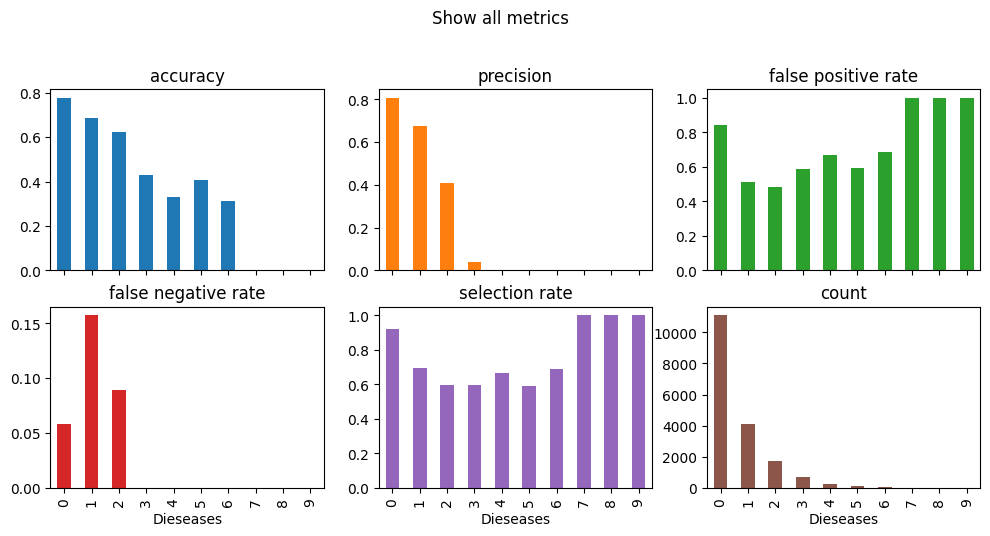

In [3]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=diseases
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [6]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
diseases = X_train["Dieseases"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=diseases)

y_pred_mitigated = mitigator.predict(X_test)

diseases = X_test["Dieseases"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=diseases)

sr_mitigated.overall

0.6834357186341248

In [5]:
print("\nMetric Frame by group: ", sr_mitigated.by_group)


Metric Frame by group:  Dieseases
0    0.691989
1    0.675085
2    0.660714
3    0.669433
4    0.656250
5    0.623656
6    0.718750
7    0.818182
8    0.500000
9    0.000000
Name: selection_rate, dtype: float64
